In [ ]:
# Obstacle Avoidance with DQN I have done

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from MazeEnv_Continuous import MazeSimulator
from DQN_Agent import DQN_Agent
import gym
import random
from IPython.display import clear_output

settings = {
    'objects': [
        'friend',
        'enemy',
    ],
    'colors': {
        'hero':   'yellow',
        'friend': 'green',
        'enemy':  'red',
    },
    'object_reward': {
        'obstacle': -1,
        'wall': -1,
    },
    'hero_bounces_off_walls': False,
    'enemy_move':True,
    'world_size': (500,500),
    'hero_initial_position': [250, 250],
    'hero_initial_speed':    [0,   0],
    'end_position':          [750, 450],
    "maximum_speed":         [10, 10],
    "enemy_max_speed":       [30, 30],
    'max_angular_speed':1,
    'max_line_speed':30,
    'max_line_acc':200,
    "object_radius": 15.0,
    "hero_radius": 10,
    "num_objects": {
        "friend" : 0,
        "enemy" :  20,
    },
    "num_observation_lines" : 200,
    'num_action':5,
    'num_state':200,
    "observation_line_length": 200,
    "laser_buffer_length":1,
    "obstacle_tolerance":0.5,
    "delta_v": 50,
    "sim_dt":0.1,
    'DQN':{
        'learning_rate_A':0.0001,
        'learning_rate_C':0.001,
        'gamma':0.99,
        'batch_size':16,
        'replay_buffer_size':1000000,
        'soft_update_rate':0.001,
        'USECONV':False,
        'net_structure': 'NORMAL',
        'num_conv1':32,
        'num_conv2':64,
        'num_fc1':512,
        'num_fc2':128,
    }
}
mv = settings['max_line_speed']
actionmap = [[0,mv],[mv,0],[0,-mv],[-mv,0],[0,0]]

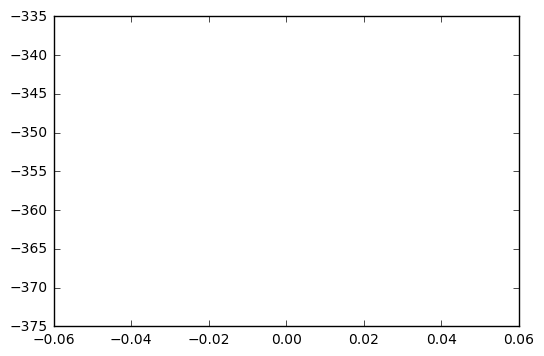

0 Episode 0 rsum: -356 lenbuff 1000
399 Episode 1 rsum: -250 sigma: 0.996017929603
1399 Episode 2 rsum: -353 sigma: 0.986107336309
2399 Episode 3 rsum: -275 sigma: 0.976295355557
3399 Episode 4 rsum: -351 sigma: 0.966581006129
4399 Episode 5 rsum: -298 sigma: 0.956963316575
5399 Episode 6 rsum: -258 sigma: 0.947441325107
6399 Episode 7 rsum: -282 sigma: 0.938014079508
7399 Episode 8 rsum: -265 sigma: 0.928680637037
8399 Episode 9 rsum: -292 sigma: 0.919440064332
9399 Episode 10 rsum: -205 sigma: 0.91029143732
10399 Episode 11 rsum: -223 sigma: 0.90123384112
11399 Episode 12 rsum: -215 sigma: 0.892266369956
12399 Episode 13 rsum: -182 sigma: 0.883388127066
13399 Episode 14 rsum: -193 sigma: 0.874598224607
14399 Episode 15 rsum: -186 sigma: 0.865895783574
15399 Episode 16 rsum: -209 sigma: 0.857279933708
16399 Episode 17 rsum: -133 sigma: 0.848749813406
17399 Episode 18 rsum: -150 sigma: 0.840304569642
18399 Episode 19 rsum: -162 sigma: 0.831943357875
19399 Episode 20 rsum: -165 sigma: 0

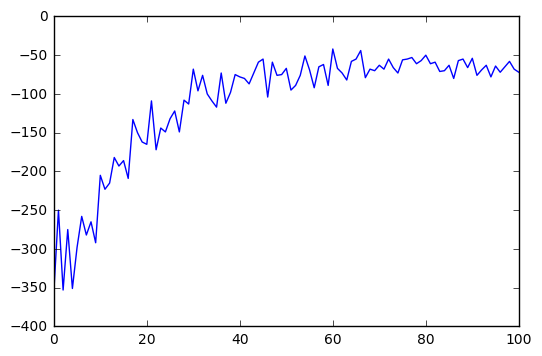

99399 Episode 100 rsum: -72 sigma: 0.370095214494
100399 Episode 101 rsum: -86 sigma: 0.366412687261
101399 Episode 102 rsum: -87 sigma: 0.362766801967
102399 Episode 103 rsum: -69 sigma: 0.35915719402
103399 Episode 104 rsum: -82 sigma: 0.35558350245
104399 Episode 105 rsum: -69 sigma: 0.352045369882
105399 Episode 106 rsum: -93 sigma: 0.348542442496
106399 Episode 107 rsum: -84 sigma: 0.345074369994
107399 Episode 108 rsum: -78 sigma: 0.341640805562
108399 Episode 109 rsum: -74 sigma: 0.338241405836
109399 Episode 110 rsum: -94 sigma: 0.334875830871
110399 Episode 111 rsum: -82 sigma: 0.331543744104
111399 Episode 112 rsum: -83 sigma: 0.328244812318
112399 Episode 113 rsum: -91 sigma: 0.324978705615
113399 Episode 114 rsum: -90 sigma: 0.321745097379
114399 Episode 115 rsum: -81 sigma: 0.318543664243
115399 Episode 116 rsum: -77 sigma: 0.315374086056
116399 Episode 117 rsum: -91 sigma: 0.312236045857
117399 Episode 118 rsum: -110 sigma: 0.309129229835
118399 Episode 119 rsum: -75 sigm

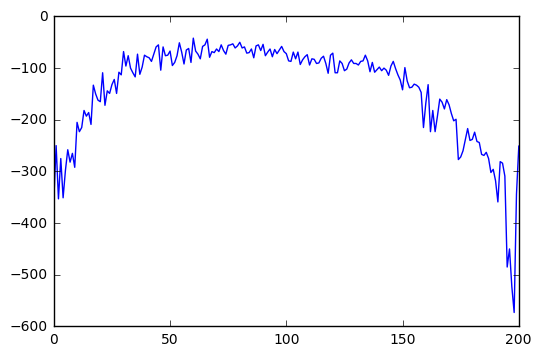

199399 Episode 200 rsum: -251 sigma: 0.136149739934
200399 Episode 201 rsum: -308 sigma: 0.134795020647
201399 Episode 202 rsum: -437 sigma: 0.133453781109
202399 Episode 203 rsum: -403 sigma: 0.132125887194
203399 Episode 204 rsum: -339 sigma: 0.13081120611
204399 Episode 205 rsum: -273 sigma: 0.129509606386
205399 Episode 206 rsum: -364 sigma: 0.12822095786
206399 Episode 207 rsum: -318 sigma: 0.126945131665
207399 Episode 208 rsum: -382 sigma: 0.125682000216
208399 Episode 209 rsum: -478 sigma: 0.124431437198
209399 Episode 210 rsum: -588 sigma: 0.123193317551
210399 Episode 211 rsum: -803 sigma: 0.121967517462
211399 Episode 212 rsum: -657 sigma: 0.120753914348
212399 Episode 213 rsum: -548 sigma: 0.119552386848
213399 Episode 214 rsum: -489 sigma: 0.118362814805
214399 Episode 215 rsum: -333 sigma: 0.11718507926
215399 Episode 216 rsum: -492 sigma: 0.116019062438
216399 Episode 217 rsum: -435 sigma: 0.114864647736
217399 Episode 218 rsum: -403 sigma: 0.113721719708
218399 Episode 

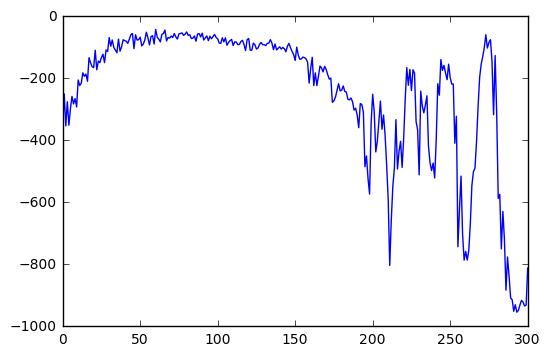

299399 Episode 300 rsum: -812 sigma: 0.1
300399 Episode 301 rsum: -785 sigma: 0.1
301399 Episode 302 rsum: -776 sigma: 0.1
302399 Episode 303 rsum: -801 sigma: 0.1
303399 Episode 304 rsum: -626 sigma: 0.1
304399 Episode 305 rsum: -549 sigma: 0.1
305399 Episode 306 rsum: -489 sigma: 0.1
306399 Episode 307 rsum: -295 sigma: 0.1
307399 Episode 308 rsum: -218 sigma: 0.1
308399 Episode 309 rsum: -138 sigma: 0.1
309399 Episode 310 rsum: -88 sigma: 0.1
310399 Episode 311 rsum: -98 sigma: 0.1
311399 Episode 312 rsum: -73 sigma: 0.1
312399 Episode 313 rsum: -68 sigma: 0.1
313399 Episode 314 rsum: -46 sigma: 0.1
314399 Episode 315 rsum: -33 sigma: 0.1
315399 Episode 316 rsum: -35 sigma: 0.1
316399 Episode 317 rsum: -25 sigma: 0.1
317399 Episode 318 rsum: -24 sigma: 0.1
318399 Episode 319 rsum: -25 sigma: 0.1
319399 Episode 320 rsum: -35 sigma: 0.1
320399 Episode 321 rsum: -29 sigma: 0.1
321399 Episode 322 rsum: -32 sigma: 0.1
322399 Episode 323 rsum: -30 sigma: 0.1
323399 Episode 324 rsum: -32 s

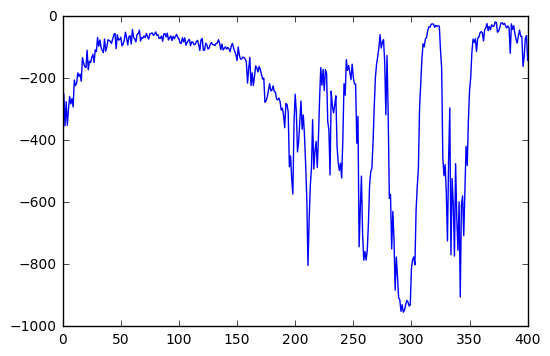

399399 Episode 400 rsum: -142 sigma: 0.1
400399 Episode 401 rsum: -184 sigma: 0.1
401399 Episode 402 rsum: -94 sigma: 0.1
402399 Episode 403 rsum: -75 sigma: 0.1
403399 Episode 404 rsum: -117 sigma: 0.1
404399 Episode 405 rsum: -215 sigma: 0.1
405399 Episode 406 rsum: -332 sigma: 0.1
406399 Episode 407 rsum: -611 sigma: 0.1
407399 Episode 408 rsum: -422 sigma: 0.1
408399 Episode 409 rsum: -216 sigma: 0.1
409399 Episode 410 rsum: -418 sigma: 0.1
410399 Episode 411 rsum: -238 sigma: 0.1
411399 Episode 412 rsum: -221 sigma: 0.1
412399 Episode 413 rsum: -393 sigma: 0.1
413399 Episode 414 rsum: -320 sigma: 0.1
414399 Episode 415 rsum: -553 sigma: 0.1
415399 Episode 416 rsum: -358 sigma: 0.1
416399 Episode 417 rsum: -288 sigma: 0.1
417399 Episode 418 rsum: -378 sigma: 0.1
418399 Episode 419 rsum: -299 sigma: 0.1
419399 Episode 420 rsum: -528 sigma: 0.1
420399 Episode 421 rsum: -441 sigma: 0.1
421399 Episode 422 rsum: -340 sigma: 0.1
422399 Episode 423 rsum: -278 sigma: 0.1
423399 Episode 424

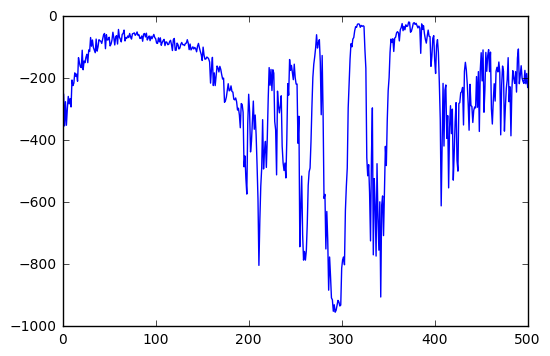

499399 Episode 500 rsum: -229 sigma: 0.1
500399 Episode 501 rsum: -135 sigma: 0.1
501399 Episode 502 rsum: -145 sigma: 0.1
502399 Episode 503 rsum: -107 sigma: 0.1
503399 Episode 504 rsum: -137 sigma: 0.1
504399 Episode 505 rsum: -249 sigma: 0.1
505399 Episode 506 rsum: -159 sigma: 0.1
506399 Episode 507 rsum: -148 sigma: 0.1
507399 Episode 508 rsum: -121 sigma: 0.1
508399 Episode 509 rsum: -106 sigma: 0.1
509399 Episode 510 rsum: -159 sigma: 0.1
510399 Episode 511 rsum: -159 sigma: 0.1
511399 Episode 512 rsum: -159 sigma: 0.1
512399 Episode 513 rsum: -165 sigma: 0.1
513399 Episode 514 rsum: -105 sigma: 0.1
514399 Episode 515 rsum: -139 sigma: 0.1
515399 Episode 516 rsum: -151 sigma: 0.1
516399 Episode 517 rsum: -194 sigma: 0.1
517399 Episode 518 rsum: -152 sigma: 0.1
518399 Episode 519 rsum: -96 sigma: 0.1
519399 Episode 520 rsum: -178 sigma: 0.1
520399 Episode 521 rsum: -204 sigma: 0.1
521399 Episode 522 rsum: -183 sigma: 0.1
522399 Episode 523 rsum: -407 sigma: 0.1
523399 Episode 52

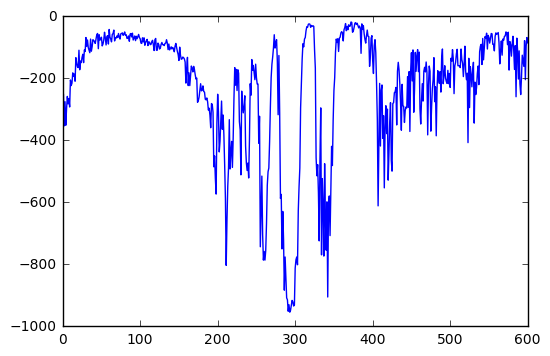

599399 Episode 600 rsum: -85 sigma: 0.1
600399 Episode 601 rsum: -72 sigma: 0.1
601399 Episode 602 rsum: -85 sigma: 0.1
602399 Episode 603 rsum: -119 sigma: 0.1
603399 Episode 604 rsum: -71 sigma: 0.1
604399 Episode 605 rsum: -103 sigma: 0.1
605399 Episode 606 rsum: -69 sigma: 0.1
606399 Episode 607 rsum: -102 sigma: 0.1
607399 Episode 608 rsum: -66 sigma: 0.1
608399 Episode 609 rsum: -86 sigma: 0.1
609399 Episode 610 rsum: -50 sigma: 0.1
610399 Episode 611 rsum: -52 sigma: 0.1
611399 Episode 612 rsum: -97 sigma: 0.1
612399 Episode 613 rsum: -44 sigma: 0.1
613399 Episode 614 rsum: -54 sigma: 0.1
614399 Episode 615 rsum: -60 sigma: 0.1
615399 Episode 616 rsum: -49 sigma: 0.1
616399 Episode 617 rsum: -118 sigma: 0.1
617399 Episode 618 rsum: -61 sigma: 0.1
618399 Episode 619 rsum: -43 sigma: 0.1
619399 Episode 620 rsum: -66 sigma: 0.1
620399 Episode 621 rsum: -66 sigma: 0.1
621399 Episode 622 rsum: -53 sigma: 0.1
622399 Episode 623 rsum: -38 sigma: 0.1
623399 Episode 624 rsum: -47 sigma: 

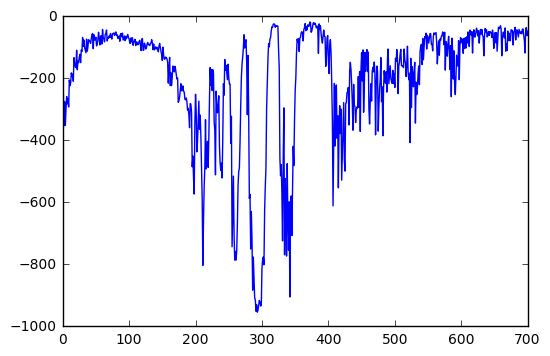

699399 Episode 700 rsum: -48 sigma: 0.1
700399 Episode 701 rsum: -46 sigma: 0.1
701399 Episode 702 rsum: -35 sigma: 0.1
702399 Episode 703 rsum: -43 sigma: 0.1
703399 Episode 704 rsum: -58 sigma: 0.1
704399 Episode 705 rsum: -63 sigma: 0.1
705399 Episode 706 rsum: -43 sigma: 0.1
706399 Episode 707 rsum: -51 sigma: 0.1
707399 Episode 708 rsum: -42 sigma: 0.1
708399 Episode 709 rsum: -104 sigma: 0.1
709399 Episode 710 rsum: -54 sigma: 0.1
710399 Episode 711 rsum: -55 sigma: 0.1
711399 Episode 712 rsum: -52 sigma: 0.1
712399 Episode 713 rsum: -38 sigma: 0.1
713399 Episode 714 rsum: -48 sigma: 0.1
714399 Episode 715 rsum: -55 sigma: 0.1
715399 Episode 716 rsum: -107 sigma: 0.1
716399 Episode 717 rsum: -62 sigma: 0.1
717399 Episode 718 rsum: -51 sigma: 0.1
718399 Episode 719 rsum: -47 sigma: 0.1
719399 Episode 720 rsum: -48 sigma: 0.1
720399 Episode 721 rsum: -61 sigma: 0.1
721399 Episode 722 rsum: -43 sigma: 0.1
722399 Episode 723 rsum: -72 sigma: 0.1
723399 Episode 724 rsum: -52 sigma: 0.

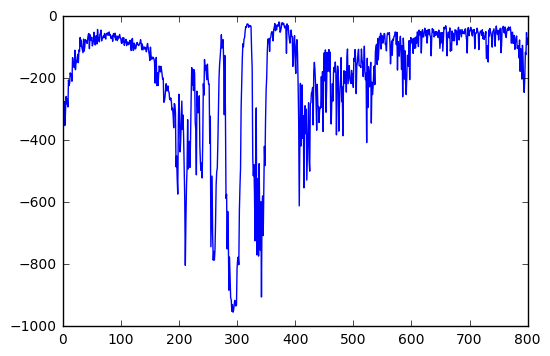

799399 Episode 800 rsum: -71 sigma: 0.1
800399 Episode 801 rsum: -86 sigma: 0.1
801399 Episode 802 rsum: -71 sigma: 0.1
802399 Episode 803 rsum: -130 sigma: 0.1
803399 Episode 804 rsum: -107 sigma: 0.1
804399 Episode 805 rsum: -279 sigma: 0.1
805399 Episode 806 rsum: -110 sigma: 0.1
806399 Episode 807 rsum: -34 sigma: 0.1
807399 Episode 808 rsum: -116 sigma: 0.1
808399 Episode 809 rsum: -72 sigma: 0.1
809399 Episode 810 rsum: -138 sigma: 0.1
810399 Episode 811 rsum: -142 sigma: 0.1
811399 Episode 812 rsum: -120 sigma: 0.1
812399 Episode 813 rsum: -99 sigma: 0.1
813399 Episode 814 rsum: -81 sigma: 0.1
814399 Episode 815 rsum: -107 sigma: 0.1
815399 Episode 816 rsum: -119 sigma: 0.1
816399 Episode 817 rsum: -95 sigma: 0.1
817399 Episode 818 rsum: -42 sigma: 0.1
818399 Episode 819 rsum: -85 sigma: 0.1
819399 Episode 820 rsum: -81 sigma: 0.1
820399 Episode 821 rsum: -41 sigma: 0.1
821399 Episode 822 rsum: -55 sigma: 0.1
822399 Episode 823 rsum: -60 sigma: 0.1
823399 Episode 824 rsum: -40 s

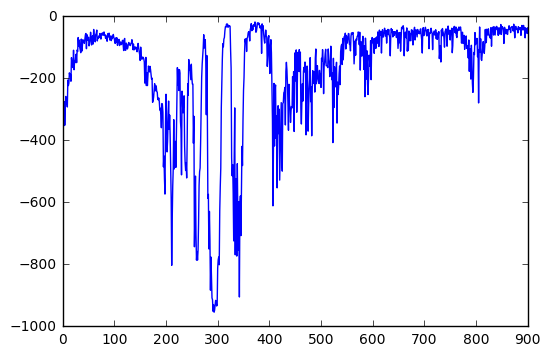

899399 Episode 900 rsum: -37 sigma: 0.1
900399 Episode 901 rsum: -37 sigma: 0.1
901399 Episode 902 rsum: -53 sigma: 0.1
902399 Episode 903 rsum: -40 sigma: 0.1
903399 Episode 904 rsum: -38 sigma: 0.1
904399 Episode 905 rsum: -50 sigma: 0.1
905399 Episode 906 rsum: -65 sigma: 0.1
906399 Episode 907 rsum: -45 sigma: 0.1
907399 Episode 908 rsum: -36 sigma: 0.1
908399 Episode 909 rsum: -29 sigma: 0.1
909399 Episode 910 rsum: -42 sigma: 0.1
910399 Episode 911 rsum: -36 sigma: 0.1
911399 Episode 912 rsum: -39 sigma: 0.1
912399 Episode 913 rsum: -40 sigma: 0.1
913399 Episode 914 rsum: -47 sigma: 0.1
914399 Episode 915 rsum: -29 sigma: 0.1
915399 Episode 916 rsum: -35 sigma: 0.1
916399 Episode 917 rsum: -34 sigma: 0.1
917399 Episode 918 rsum: -26 sigma: 0.1
918399 Episode 919 rsum: -35 sigma: 0.1
919399 Episode 920 rsum: -47 sigma: 0.1
920399 Episode 921 rsum: -83 sigma: 0.1
921399 Episode 922 rsum: -41 sigma: 0.1
922399 Episode 923 rsum: -50 sigma: 0.1
923399 Episode 924 rsum: -52 sigma: 0.1


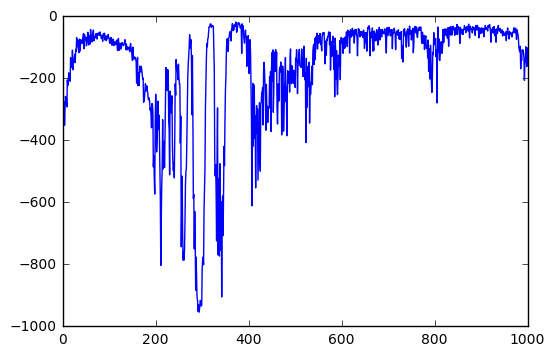

999399 Episode 1000 rsum: -102 sigma: 0.1
1000399 Episode 1001 rsum: -69 sigma: 0.1
1001399 Episode 1002 rsum: -97 sigma: 0.1
1002399 Episode 1003 rsum: -75 sigma: 0.1
1003399 Episode 1004 rsum: -71 sigma: 0.1
1004399 Episode 1005 rsum: -69 sigma: 0.1
1005399 Episode 1006 rsum: -56 sigma: 0.1
1006399 Episode 1007 rsum: -77 sigma: 0.1
1007399 Episode 1008 rsum: -68 sigma: 0.1
1008399 Episode 1009 rsum: -69 sigma: 0.1
1009399 Episode 1010 rsum: -57 sigma: 0.1
1010399 Episode 1011 rsum: -68 sigma: 0.1
1011399 Episode 1012 rsum: -68 sigma: 0.1
1012399 Episode 1013 rsum: -53 sigma: 0.1
1013399 Episode 1014 rsum: -79 sigma: 0.1
1014399 Episode 1015 rsum: -70 sigma: 0.1
1015399 Episode 1016 rsum: -64 sigma: 0.1
1016399 Episode 1017 rsum: -65 sigma: 0.1
1017399 Episode 1018 rsum: -60 sigma: 0.1
1018399 Episode 1019 rsum: -63 sigma: 0.1
1019399 Episode 1020 rsum: -67 sigma: 0.1
1020399 Episode 1021 rsum: -62 sigma: 0.1
1021399 Episode 1022 rsum: -52 sigma: 0.1
1022399 Episode 1023 rsum: -62 sig

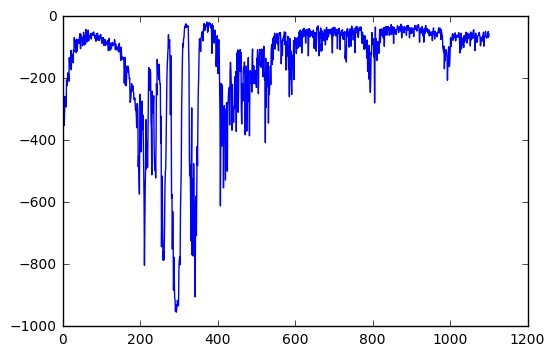

1099399 Episode 1100 rsum: -57 sigma: 0.1
1100399 Episode 1101 rsum: -48 sigma: 0.1
1101399 Episode 1102 rsum: -68 sigma: 0.1
1102399 Episode 1103 rsum: -154 sigma: 0.1
1103399 Episode 1104 rsum: -92 sigma: 0.1
1104399 Episode 1105 rsum: -59 sigma: 0.1
1105399 Episode 1106 rsum: -55 sigma: 0.1
1106399 Episode 1107 rsum: -36 sigma: 0.1
1107399 Episode 1108 rsum: -53 sigma: 0.1
1108399 Episode 1109 rsum: -56 sigma: 0.1
1109399 Episode 1110 rsum: -97 sigma: 0.1
1110399 Episode 1111 rsum: -53 sigma: 0.1
1111399 Episode 1112 rsum: -70 sigma: 0.1
1112399 Episode 1113 rsum: -81 sigma: 0.1
1113399 Episode 1114 rsum: -70 sigma: 0.1
1114399 Episode 1115 rsum: -95 sigma: 0.1
1115399 Episode 1116 rsum: -49 sigma: 0.1
1116399 Episode 1117 rsum: -78 sigma: 0.1
1117399 Episode 1118 rsum: -56 sigma: 0.1
1118399 Episode 1119 rsum: -73 sigma: 0.1
1119399 Episode 1120 rsum: -45 sigma: 0.1
1120399 Episode 1121 rsum: -61 sigma: 0.1
1121399 Episode 1122 rsum: -36 sigma: 0.1
1122399 Episode 1123 rsum: -55 si

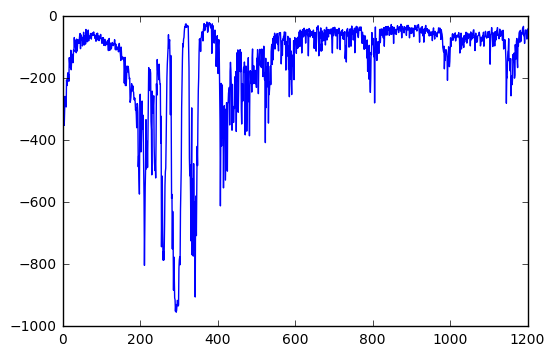

1199399 Episode 1200 rsum: -41 sigma: 0.1
1200399 Episode 1201 rsum: -45 sigma: 0.1
1201399 Episode 1202 rsum: -37 sigma: 0.1
1202399 Episode 1203 rsum: -32 sigma: 0.1
1203399 Episode 1204 rsum: -35 sigma: 0.1
1204399 Episode 1205 rsum: -34 sigma: 0.1
1205399 Episode 1206 rsum: -31 sigma: 0.1
1206399 Episode 1207 rsum: -32 sigma: 0.1
1207399 Episode 1208 rsum: -31 sigma: 0.1
1208399 Episode 1209 rsum: -65 sigma: 0.1
1209399 Episode 1210 rsum: -36 sigma: 0.1
1210399 Episode 1211 rsum: -63 sigma: 0.1
1211399 Episode 1212 rsum: -46 sigma: 0.1
1212399 Episode 1213 rsum: -35 sigma: 0.1
1213399 Episode 1214 rsum: -38 sigma: 0.1
1214399 Episode 1215 rsum: -53 sigma: 0.1
1215399 Episode 1216 rsum: -54 sigma: 0.1
1216399 Episode 1217 rsum: -42 sigma: 0.1
1217399 Episode 1218 rsum: -25 sigma: 0.1
1218399 Episode 1219 rsum: -32 sigma: 0.1
1219399 Episode 1220 rsum: -37 sigma: 0.1
1220399 Episode 1221 rsum: -58 sigma: 0.1
1221399 Episode 1222 rsum: -42 sigma: 0.1
1222399 Episode 1223 rsum: -43 sig

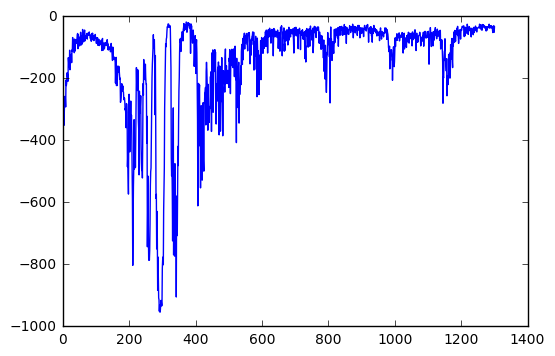

1299399 Episode 1300 rsum: -34 sigma: 0.1
1300399 Episode 1301 rsum: -48 sigma: 0.1
1301399 Episode 1302 rsum: -58 sigma: 0.1
1302399 Episode 1303 rsum: -66 sigma: 0.1
1303399 Episode 1304 rsum: -35 sigma: 0.1
1304399 Episode 1305 rsum: -51 sigma: 0.1
1305399 Episode 1306 rsum: -40 sigma: 0.1
1306399 Episode 1307 rsum: -32 sigma: 0.1
1307399 Episode 1308 rsum: -31 sigma: 0.1
1308399 Episode 1309 rsum: -98 sigma: 0.1
1309399 Episode 1310 rsum: -60 sigma: 0.1
1310399 Episode 1311 rsum: -234 sigma: 0.1
1311399 Episode 1312 rsum: -126 sigma: 0.1
1312399 Episode 1313 rsum: -215 sigma: 0.1
1313399 Episode 1314 rsum: -35 sigma: 0.1
1314399 Episode 1315 rsum: -65 sigma: 0.1
1315399 Episode 1316 rsum: -156 sigma: 0.1
1316399 Episode 1317 rsum: -53 sigma: 0.1
1317399 Episode 1318 rsum: -91 sigma: 0.1
1318399 Episode 1319 rsum: -55 sigma: 0.1
1319399 Episode 1320 rsum: -56 sigma: 0.1
1320399 Episode 1321 rsum: -51 sigma: 0.1
1321399 Episode 1322 rsum: -80 sigma: 0.1
1322399 Episode 1323 rsum: -64

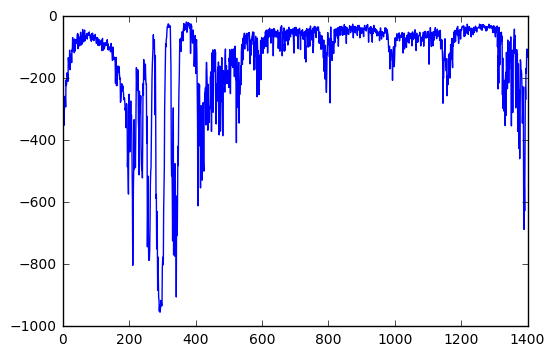

1399399 Episode 1400 rsum: -124 sigma: 0.1
1400399 Episode 1401 rsum: -167 sigma: 0.1
1401399 Episode 1402 rsum: -161 sigma: 0.1
1402399 Episode 1403 rsum: -138 sigma: 0.1
1403399 Episode 1404 rsum: -259 sigma: 0.1
1404399 Episode 1405 rsum: -125 sigma: 0.1
1405399 Episode 1406 rsum: -202 sigma: 0.1
1406399 Episode 1407 rsum: -170 sigma: 0.1
1407399 Episode 1408 rsum: -251 sigma: 0.1
1408399 Episode 1409 rsum: -149 sigma: 0.1
1409399 Episode 1410 rsum: -142 sigma: 0.1
1410399 Episode 1411 rsum: -181 sigma: 0.1
1411399 Episode 1412 rsum: -254 sigma: 0.1
1412399 Episode 1413 rsum: -234 sigma: 0.1
1413399 Episode 1414 rsum: -126 sigma: 0.1
1414399 Episode 1415 rsum: -118 sigma: 0.1
1415399 Episode 1416 rsum: -104 sigma: 0.1
1416399 Episode 1417 rsum: -68 sigma: 0.1
1417399 Episode 1418 rsum: -90 sigma: 0.1
1418399 Episode 1419 rsum: -83 sigma: 0.1
1419399 Episode 1420 rsum: -73 sigma: 0.1
1420399 Episode 1421 rsum: -95 sigma: 0.1
1421399 Episode 1422 rsum: -96 sigma: 0.1
1422399 Episode 1

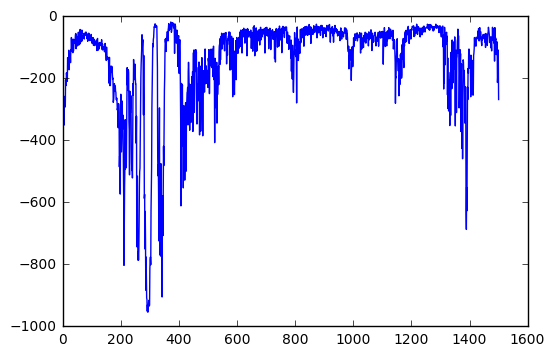

1499399 Episode 1500 rsum: -268 sigma: 0.1
1500399 Episode 1501 rsum: -172 sigma: 0.1
1501399 Episode 1502 rsum: -119 sigma: 0.1
1502399 Episode 1503 rsum: -95 sigma: 0.1
1503399 Episode 1504 rsum: -205 sigma: 0.1
1504399 Episode 1505 rsum: -59 sigma: 0.1
1505399 Episode 1506 rsum: -306 sigma: 0.1
1506399 Episode 1507 rsum: -176 sigma: 0.1
1507399 Episode 1508 rsum: -167 sigma: 0.1
1508399 Episode 1509 rsum: -148 sigma: 0.1
1509399 Episode 1510 rsum: -280 sigma: 0.1
1510399 Episode 1511 rsum: -120 sigma: 0.1
1511399 Episode 1512 rsum: -292 sigma: 0.1
1512399 Episode 1513 rsum: -184 sigma: 0.1
1513399 Episode 1514 rsum: -349 sigma: 0.1
1514399 Episode 1515 rsum: -242 sigma: 0.1
1515399 Episode 1516 rsum: -118 sigma: 0.1
1516399 Episode 1517 rsum: -109 sigma: 0.1
1517399 Episode 1518 rsum: -193 sigma: 0.1
1518399 Episode 1519 rsum: -291 sigma: 0.1
1519399 Episode 1520 rsum: -105 sigma: 0.1
1520399 Episode 1521 rsum: -175 sigma: 0.1
1521399 Episode 1522 rsum: -148 sigma: 0.1
1522399 Episo

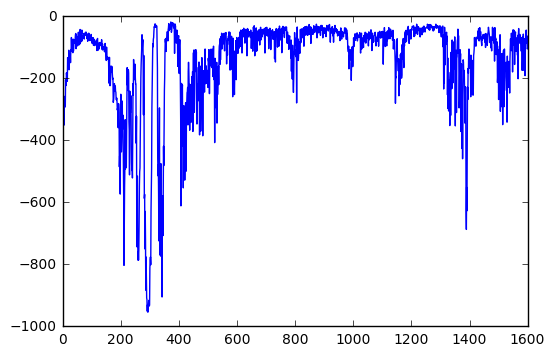

1599399 Episode 1600 rsum: -99 sigma: 0.1
1600399 Episode 1601 rsum: -141 sigma: 0.1
1601399 Episode 1602 rsum: -99 sigma: 0.1
1602399 Episode 1603 rsum: -96 sigma: 0.1
1603399 Episode 1604 rsum: -124 sigma: 0.1
1604399 Episode 1605 rsum: -119 sigma: 0.1
1605399 Episode 1606 rsum: -129 sigma: 0.1
1606399 Episode 1607 rsum: -167 sigma: 0.1
1607399 Episode 1608 rsum: -209 sigma: 0.1
1608399 Episode 1609 rsum: -55 sigma: 0.1
1609399 Episode 1610 rsum: -93 sigma: 0.1
1610399 Episode 1611 rsum: -212 sigma: 0.1
1611399 Episode 1612 rsum: -111 sigma: 0.1
1612399 Episode 1613 rsum: -115 sigma: 0.1
1613399 Episode 1614 rsum: -149 sigma: 0.1
1614399 Episode 1615 rsum: -101 sigma: 0.1
1615399 Episode 1616 rsum: -81 sigma: 0.1
1616399 Episode 1617 rsum: -136 sigma: 0.1
1617399 Episode 1618 rsum: -164 sigma: 0.1
1618399 Episode 1619 rsum: -93 sigma: 0.1
1619399 Episode 1620 rsum: -104 sigma: 0.1
1620399 Episode 1621 rsum: -73 sigma: 0.1
1621399 Episode 1622 rsum: -285 sigma: 0.1
1622399 Episode 162

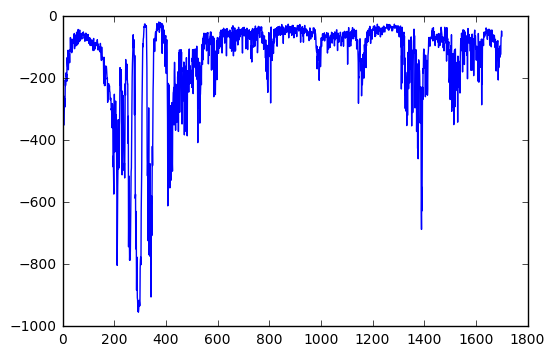

1699399 Episode 1700 rsum: -63 sigma: 0.1
1700399 Episode 1701 rsum: -119 sigma: 0.1
1701399 Episode 1702 rsum: -118 sigma: 0.1
1702399 Episode 1703 rsum: -37 sigma: 0.1
1703399 Episode 1704 rsum: -114 sigma: 0.1
1704399 Episode 1705 rsum: -73 sigma: 0.1
1705399 Episode 1706 rsum: -58 sigma: 0.1
1706399 Episode 1707 rsum: -71 sigma: 0.1
1707399 Episode 1708 rsum: -50 sigma: 0.1
1708399 Episode 1709 rsum: -52 sigma: 0.1
1709399 Episode 1710 rsum: -61 sigma: 0.1
1710399 Episode 1711 rsum: -52 sigma: 0.1
1711399 Episode 1712 rsum: -43 sigma: 0.1
1712399 Episode 1713 rsum: -55 sigma: 0.1
1713399 Episode 1714 rsum: -47 sigma: 0.1
1714399 Episode 1715 rsum: -38 sigma: 0.1
1715399 Episode 1716 rsum: -43 sigma: 0.1
1716399 Episode 1717 rsum: -90 sigma: 0.1
1717399 Episode 1718 rsum: -90 sigma: 0.1
1718399 Episode 1719 rsum: -55 sigma: 0.1
1719399 Episode 1720 rsum: -82 sigma: 0.1
1720399 Episode 1721 rsum: -88 sigma: 0.1
1721399 Episode 1722 rsum: -79 sigma: 0.1
1722399 Episode 1723 rsum: -60 

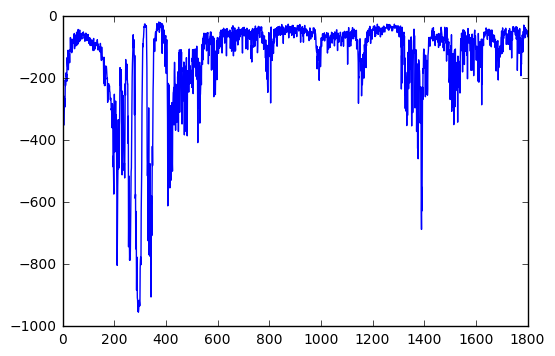

1799399 Episode 1800 rsum: -65 sigma: 0.1
1800399 Episode 1801 rsum: -37 sigma: 0.1
1801399 Episode 1802 rsum: -71 sigma: 0.1
1802399 Episode 1803 rsum: -48 sigma: 0.1
1803399 Episode 1804 rsum: -52 sigma: 0.1
1804399 Episode 1805 rsum: -44 sigma: 0.1
1805399 Episode 1806 rsum: -49 sigma: 0.1
1806399 Episode 1807 rsum: -60 sigma: 0.1
1807399 Episode 1808 rsum: -52 sigma: 0.1
1808399 Episode 1809 rsum: -67 sigma: 0.1
1809399 Episode 1810 rsum: -56 sigma: 0.1
1810399 Episode 1811 rsum: -60 sigma: 0.1
1811399 Episode 1812 rsum: -54 sigma: 0.1
1812399 Episode 1813 rsum: -56 sigma: 0.1
1813399 Episode 1814 rsum: -118 sigma: 0.1
1814399 Episode 1815 rsum: -96 sigma: 0.1
1815399 Episode 1816 rsum: -60 sigma: 0.1
1816399 Episode 1817 rsum: -165 sigma: 0.1
1817399 Episode 1818 rsum: -46 sigma: 0.1
1818399 Episode 1819 rsum: -63 sigma: 0.1
1819399 Episode 1820 rsum: -83 sigma: 0.1
1820399 Episode 1821 rsum: -244 sigma: 0.1
1821399 Episode 1822 rsum: -72 sigma: 0.1
1822399 Episode 1823 rsum: -128

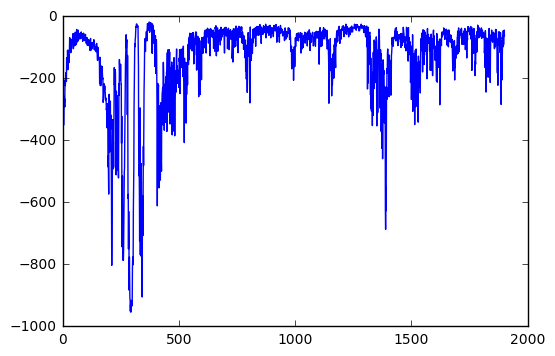

1899399 Episode 1900 rsum: -62 sigma: 0.1
1900399 Episode 1901 rsum: -50 sigma: 0.1
1901399 Episode 1902 rsum: -78 sigma: 0.1
1902399 Episode 1903 rsum: -39 sigma: 0.1
1903399 Episode 1904 rsum: -43 sigma: 0.1
1904399 Episode 1905 rsum: -72 sigma: 0.1
1905399 Episode 1906 rsum: -54 sigma: 0.1
1906399 Episode 1907 rsum: -60 sigma: 0.1
1907399 Episode 1908 rsum: -48 sigma: 0.1
1908399 Episode 1909 rsum: -47 sigma: 0.1
1909399 Episode 1910 rsum: -40 sigma: 0.1
1910399 Episode 1911 rsum: -40 sigma: 0.1
1911399 Episode 1912 rsum: -26 sigma: 0.1
1912399 Episode 1913 rsum: -48 sigma: 0.1
1913399 Episode 1914 rsum: -63 sigma: 0.1
1914399 Episode 1915 rsum: -46 sigma: 0.1
1915399 Episode 1916 rsum: -53 sigma: 0.1
1916399 Episode 1917 rsum: -29 sigma: 0.1
1917399 Episode 1918 rsum: -49 sigma: 0.1
1918399 Episode 1919 rsum: -43 sigma: 0.1
1919399 Episode 1920 rsum: -37 sigma: 0.1
1920399 Episode 1921 rsum: -40 sigma: 0.1
1921399 Episode 1922 rsum: -38 sigma: 0.1
1922399 Episode 1923 rsum: -36 sig

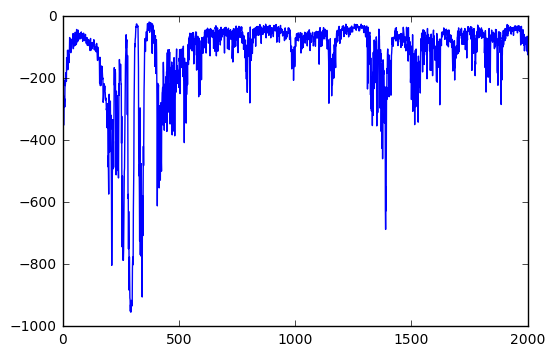

1999399 Episode 2000 rsum: -123 sigma: 0.1
2000399 Episode 2001 rsum: -105 sigma: 0.1
2001399 Episode 2002 rsum: -86 sigma: 0.1
2002399 Episode 2003 rsum: -76 sigma: 0.1
2003399 Episode 2004 rsum: -77 sigma: 0.1
2004399 Episode 2005 rsum: -97 sigma: 0.1
2005399 Episode 2006 rsum: -110 sigma: 0.1
2006399 Episode 2007 rsum: -69 sigma: 0.1
2007399 Episode 2008 rsum: -77 sigma: 0.1
2008399 Episode 2009 rsum: -96 sigma: 0.1
2009399 Episode 2010 rsum: -119 sigma: 0.1
2010399 Episode 2011 rsum: -113 sigma: 0.1
2011399 Episode 2012 rsum: -102 sigma: 0.1
2012399 Episode 2013 rsum: -69 sigma: 0.1
2013399 Episode 2014 rsum: -78 sigma: 0.1
2014399 Episode 2015 rsum: -97 sigma: 0.1
2015399 Episode 2016 rsum: -123 sigma: 0.1
2016399 Episode 2017 rsum: -157 sigma: 0.1
2017399 Episode 2018 rsum: -73 sigma: 0.1
2018399 Episode 2019 rsum: -107 sigma: 0.1
2019399 Episode 2020 rsum: -83 sigma: 0.1
2020399 Episode 2021 rsum: -69 sigma: 0.1
2021399 Episode 2022 rsum: -100 sigma: 0.1
2022399 Episode 2023 rsu

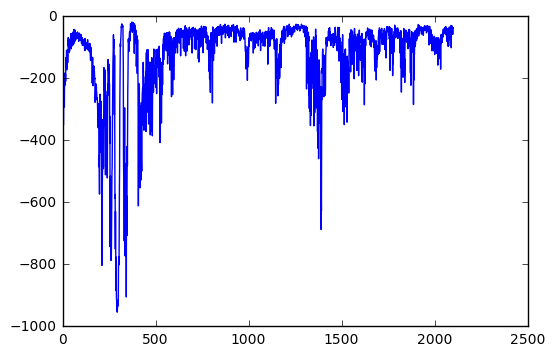

2099399 Episode 2100 rsum: -38 sigma: 0.1
2100399 Episode 2101 rsum: -50 sigma: 0.1
2101399 Episode 2102 rsum: -41 sigma: 0.1
2102399 Episode 2103 rsum: -31 sigma: 0.1
2103399 Episode 2104 rsum: -43 sigma: 0.1
2104399 Episode 2105 rsum: -57 sigma: 0.1
2105399 Episode 2106 rsum: -44 sigma: 0.1
2106399 Episode 2107 rsum: -41 sigma: 0.1
2107399 Episode 2108 rsum: -42 sigma: 0.1
2108399 Episode 2109 rsum: -39 sigma: 0.1
2109399 Episode 2110 rsum: -38 sigma: 0.1
2110399 Episode 2111 rsum: -47 sigma: 0.1
2111399 Episode 2112 rsum: -40 sigma: 0.1
2112399 Episode 2113 rsum: -41 sigma: 0.1
2113399 Episode 2114 rsum: -44 sigma: 0.1
2114399 Episode 2115 rsum: -47 sigma: 0.1
2115399 Episode 2116 rsum: -42 sigma: 0.1
2116399 Episode 2117 rsum: -48 sigma: 0.1
2117399 Episode 2118 rsum: -38 sigma: 0.1
2118399 Episode 2119 rsum: -63 sigma: 0.1
2119399 Episode 2120 rsum: -53 sigma: 0.1
2120399 Episode 2121 rsum: -39 sigma: 0.1
2121399 Episode 2122 rsum: -44 sigma: 0.1
2122399 Episode 2123 rsum: -38 sig

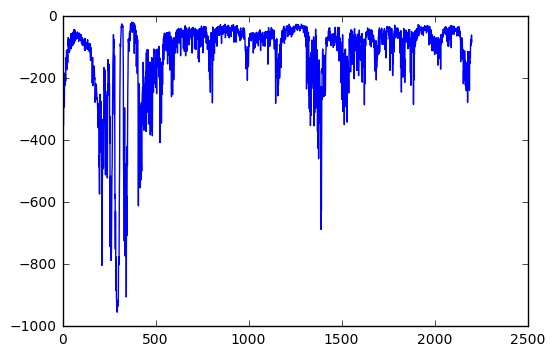

2199399 Episode 2200 rsum: -82 sigma: 0.1
2200399 Episode 2201 rsum: -106 sigma: 0.1
2201399 Episode 2202 rsum: -65 sigma: 0.1
2202399 Episode 2203 rsum: -94 sigma: 0.1
2203399 Episode 2204 rsum: -58 sigma: 0.1
2204399 Episode 2205 rsum: -87 sigma: 0.1
2205399 Episode 2206 rsum: -70 sigma: 0.1
2206399 Episode 2207 rsum: -60 sigma: 0.1
2207399 Episode 2208 rsum: -74 sigma: 0.1
2208399 Episode 2209 rsum: -88 sigma: 0.1
2209399 Episode 2210 rsum: -65 sigma: 0.1
2210399 Episode 2211 rsum: -59 sigma: 0.1
2211399 Episode 2212 rsum: -72 sigma: 0.1
2212399 Episode 2213 rsum: -52 sigma: 0.1
2213399 Episode 2214 rsum: -57 sigma: 0.1
2214399 Episode 2215 rsum: -44 sigma: 0.1
2215399 Episode 2216 rsum: -56 sigma: 0.1
2216399 Episode 2217 rsum: -41 sigma: 0.1
2217399 Episode 2218 rsum: -36 sigma: 0.1
2218399 Episode 2219 rsum: -30 sigma: 0.1
2219399 Episode 2220 rsum: -43 sigma: 0.1
2220399 Episode 2221 rsum: -31 sigma: 0.1
2221399 Episode 2222 rsum: -27 sigma: 0.1
2222399 Episode 2223 rsum: -31 si

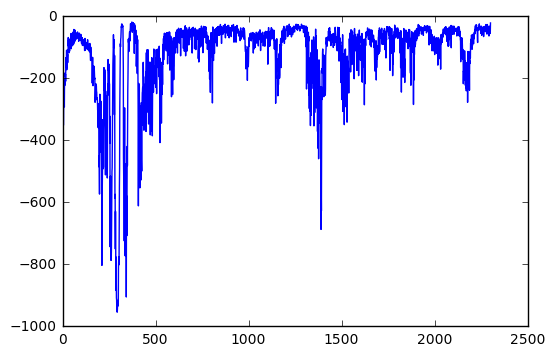

2299399 Episode 2300 rsum: -21 sigma: 0.1
2300399 Episode 2301 rsum: -39 sigma: 0.1
2301399 Episode 2302 rsum: -46 sigma: 0.1
2302399 Episode 2303 rsum: -72 sigma: 0.1
2303399 Episode 2304 rsum: -90 sigma: 0.1
2304399 Episode 2305 rsum: -47 sigma: 0.1
2305399 Episode 2306 rsum: -38 sigma: 0.1
2306399 Episode 2307 rsum: -56 sigma: 0.1
2307399 Episode 2308 rsum: -35 sigma: 0.1
2308399 Episode 2309 rsum: -36 sigma: 0.1
2309399 Episode 2310 rsum: -29 sigma: 0.1
2310399 Episode 2311 rsum: -47 sigma: 0.1
2311399 Episode 2312 rsum: -40 sigma: 0.1
2312399 Episode 2313 rsum: -38 sigma: 0.1
2313399 Episode 2314 rsum: -26 sigma: 0.1
2314399 Episode 2315 rsum: -45 sigma: 0.1
2315399 Episode 2316 rsum: -33 sigma: 0.1
2316399 Episode 2317 rsum: -34 sigma: 0.1
2317399 Episode 2318 rsum: -50 sigma: 0.1
2318399 Episode 2319 rsum: -42 sigma: 0.1
2319399 Episode 2320 rsum: -37 sigma: 0.1
2320399 Episode 2321 rsum: -38 sigma: 0.1
2321399 Episode 2322 rsum: -30 sigma: 0.1
2322399 Episode 2323 rsum: -37 sig

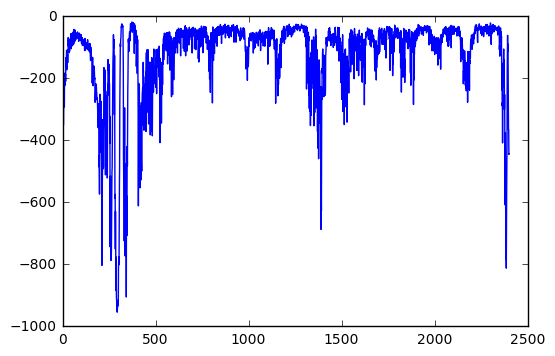

2399399 Episode 2400 rsum: -443 sigma: 0.1
2400399 Episode 2401 rsum: -548 sigma: 0.1
2401399 Episode 2402 rsum: -599 sigma: 0.1
2402399 Episode 2403 rsum: -816 sigma: 0.1
2403399 Episode 2404 rsum: -799 sigma: 0.1
2404399 Episode 2405 rsum: -609 sigma: 0.1
2405399 Episode 2406 rsum: -505 sigma: 0.1
2406399 Episode 2407 rsum: -577 sigma: 0.1
2407399 Episode 2408 rsum: -434 sigma: 0.1
2408399 Episode 2409 rsum: -433 sigma: 0.1
2409399 Episode 2410 rsum: -435 sigma: 0.1
2410399 Episode 2411 rsum: -322 sigma: 0.1
2411399 Episode 2412 rsum: -400 sigma: 0.1
2412399 Episode 2413 rsum: -174 sigma: 0.1
2413399 Episode 2414 rsum: -90 sigma: 0.1
2414399 Episode 2415 rsum: -113 sigma: 0.1
2415399 Episode 2416 rsum: -99 sigma: 0.1
2416399 Episode 2417 rsum: -57 sigma: 0.1
2417399 Episode 2418 rsum: -47 sigma: 0.1
2418399 Episode 2419 rsum: -44 sigma: 0.1
2419399 Episode 2420 rsum: -34 sigma: 0.1
2420399 Episode 2421 rsum: -47 sigma: 0.1
2421399 Episode 2422 rsum: -46 sigma: 0.1
2422399 Episode 242

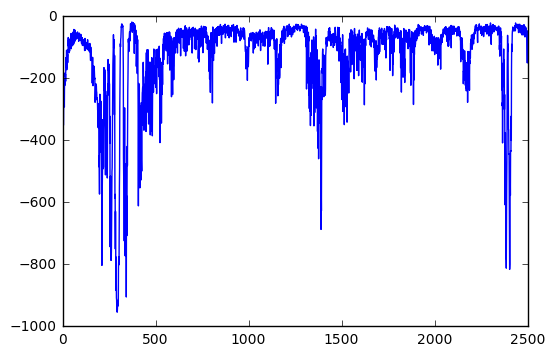

2499399 Episode 2500 rsum: -68 sigma: 0.1
2500399 Episode 2501 rsum: -48 sigma: 0.1
2501399 Episode 2502 rsum: -34 sigma: 0.1
2502399 Episode 2503 rsum: -146 sigma: 0.1
2503399 Episode 2504 rsum: -79 sigma: 0.1
2504399 Episode 2505 rsum: -81 sigma: 0.1
2505399 Episode 2506 rsum: -109 sigma: 0.1
2506399 Episode 2507 rsum: -87 sigma: 0.1
2507399 Episode 2508 rsum: -96 sigma: 0.1
2508399 Episode 2509 rsum: -93 sigma: 0.1
2509399 Episode 2510 rsum: -131 sigma: 0.1
2510399 Episode 2511 rsum: -152 sigma: 0.1
2511399 Episode 2512 rsum: -147 sigma: 0.1
2512399 Episode 2513 rsum: -99 sigma: 0.1
2513399 Episode 2514 rsum: -121 sigma: 0.1
2514399 Episode 2515 rsum: -110 sigma: 0.1
2515399 Episode 2516 rsum: -126 sigma: 0.1
2516399 Episode 2517 rsum: -48 sigma: 0.1
2517399 Episode 2518 rsum: -84 sigma: 0.1
2518399 Episode 2519 rsum: -199 sigma: 0.1
2519399 Episode 2520 rsum: -113 sigma: 0.1
2520399 Episode 2521 rsum: -133 sigma: 0.1
2521399 Episode 2522 rsum: -112 sigma: 0.1
2522399 Episode 2523 r

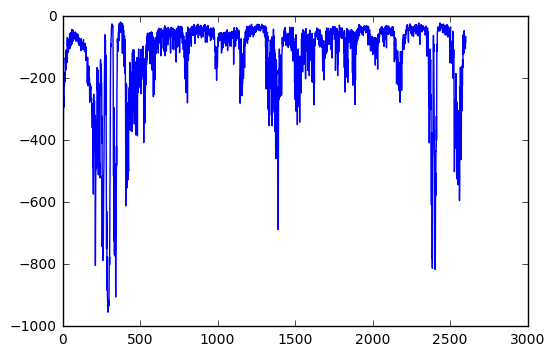

2599399 Episode 2600 rsum: -84 sigma: 0.1
2600399 Episode 2601 rsum: -46 sigma: 0.1
2601399 Episode 2602 rsum: -57 sigma: 0.1
2602399 Episode 2603 rsum: -51 sigma: 0.1
2603399 Episode 2604 rsum: -47 sigma: 0.1
2604399 Episode 2605 rsum: -35 sigma: 0.1
2605399 Episode 2606 rsum: -49 sigma: 0.1
2606399 Episode 2607 rsum: -35 sigma: 0.1
2607399 Episode 2608 rsum: -39 sigma: 0.1
2608399 Episode 2609 rsum: -58 sigma: 0.1
2609399 Episode 2610 rsum: -47 sigma: 0.1
2610399 Episode 2611 rsum: -58 sigma: 0.1
2611399 Episode 2612 rsum: -102 sigma: 0.1
2612399 Episode 2613 rsum: -59 sigma: 0.1
2613399 Episode 2614 rsum: -65 sigma: 0.1
2614399 Episode 2615 rsum: -78 sigma: 0.1
2615399 Episode 2616 rsum: -35 sigma: 0.1
2616399 Episode 2617 rsum: -44 sigma: 0.1
2617399 Episode 2618 rsum: -59 sigma: 0.1
2618399 Episode 2619 rsum: -55 sigma: 0.1
2619399 Episode 2620 rsum: -75 sigma: 0.1
2620399 Episode 2621 rsum: -34 sigma: 0.1
2621399 Episode 2622 rsum: -37 sigma: 0.1
2622399 Episode 2623 rsum: -16 si

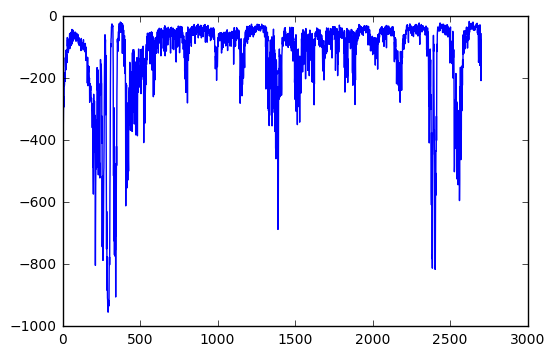

2699399 Episode 2700 rsum: -56 sigma: 0.1
2700399 Episode 2701 rsum: -88 sigma: 0.1
2701399 Episode 2702 rsum: -98 sigma: 0.1
2702399 Episode 2703 rsum: -44 sigma: 0.1
2703399 Episode 2704 rsum: -84 sigma: 0.1
2704399 Episode 2705 rsum: -170 sigma: 0.1
2705399 Episode 2706 rsum: -140 sigma: 0.1
2706399 Episode 2707 rsum: -178 sigma: 0.1
2707399 Episode 2708 rsum: -272 sigma: 0.1
2708399 Episode 2709 rsum: -117 sigma: 0.1
2709399 Episode 2710 rsum: -89 sigma: 0.1
2710399 Episode 2711 rsum: -80 sigma: 0.1
2711399 Episode 2712 rsum: -139 sigma: 0.1
2712399 Episode 2713 rsum: -139 sigma: 0.1
2713399 Episode 2714 rsum: -123 sigma: 0.1
2714399 Episode 2715 rsum: -86 sigma: 0.1
2715399 Episode 2716 rsum: -139 sigma: 0.1
2716399 Episode 2717 rsum: -178 sigma: 0.1
2717399 Episode 2718 rsum: -132 sigma: 0.1
2718399 Episode 2719 rsum: -145 sigma: 0.1
2719399 Episode 2720 rsum: -137 sigma: 0.1
2720399 Episode 2721 rsum: -66 sigma: 0.1
2721399 Episode 2722 rsum: -298 sigma: 0.1
2722399 Episode 2723

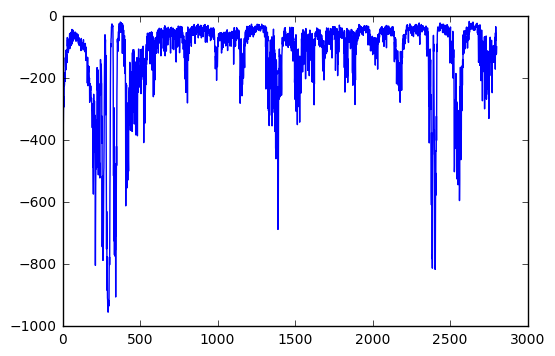

2799399 Episode 2800 rsum: -98 sigma: 0.1
2800399 Episode 2801 rsum: -111 sigma: 0.1
2801399 Episode 2802 rsum: -119 sigma: 0.1
2802399 Episode 2803 rsum: -166 sigma: 0.1
2803399 Episode 2804 rsum: -204 sigma: 0.1
2804399 Episode 2805 rsum: -145 sigma: 0.1
2805399 Episode 2806 rsum: -220 sigma: 0.1
2806399 Episode 2807 rsum: -256 sigma: 0.1
2807399 Episode 2808 rsum: -166 sigma: 0.1
2808399 Episode 2809 rsum: -111 sigma: 0.1
2809399 Episode 2810 rsum: -127 sigma: 0.1
2810399 Episode 2811 rsum: -174 sigma: 0.1
2811399 Episode 2812 rsum: -171 sigma: 0.1
2812399 Episode 2813 rsum: -108 sigma: 0.1
2813399 Episode 2814 rsum: -139 sigma: 0.1
2814399 Episode 2815 rsum: -143 sigma: 0.1
2815399 Episode 2816 rsum: -173 sigma: 0.1
2816399 Episode 2817 rsum: -279 sigma: 0.1
2817399 Episode 2818 rsum: -196 sigma: 0.1
2818399 Episode 2819 rsum: -225 sigma: 0.1
2819399 Episode 2820 rsum: -154 sigma: 0.1
2820399 Episode 2821 rsum: -198 sigma: 0.1
2821399 Episode 2822 rsum: -187 sigma: 0.1
2822399 Epis

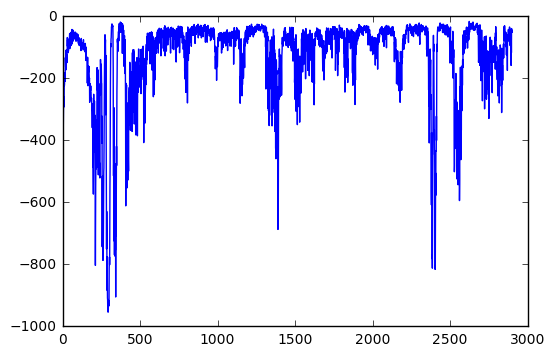

2899399 Episode 2900 rsum: -51 sigma: 0.1
2900399 Episode 2901 rsum: -54 sigma: 0.1
2901399 Episode 2902 rsum: -211 sigma: 0.1
2902399 Episode 2903 rsum: -47 sigma: 0.1
2903399 Episode 2904 rsum: -90 sigma: 0.1
2904399 Episode 2905 rsum: -76 sigma: 0.1
2905399 Episode 2906 rsum: -50 sigma: 0.1
2906399 Episode 2907 rsum: -51 sigma: 0.1
2907399 Episode 2908 rsum: -38 sigma: 0.1
2908399 Episode 2909 rsum: -55 sigma: 0.1
2909399 Episode 2910 rsum: -86 sigma: 0.1
2910399 Episode 2911 rsum: -116 sigma: 0.1
2911399 Episode 2912 rsum: -45 sigma: 0.1
2912399 Episode 2913 rsum: -48 sigma: 0.1
2913399 Episode 2914 rsum: -38 sigma: 0.1
2914399 Episode 2915 rsum: -47 sigma: 0.1
2915399 Episode 2916 rsum: -31 sigma: 0.1
2916399 Episode 2917 rsum: -31 sigma: 0.1
2917399 Episode 2918 rsum: -44 sigma: 0.1
2918399 Episode 2919 rsum: -53 sigma: 0.1
2919399 Episode 2920 rsum: -35 sigma: 0.1
2920399 Episode 2921 rsum: -34 sigma: 0.1
2921399 Episode 2922 rsum: -45 sigma: 0.1
2922399 Episode 2923 rsum: -73 s

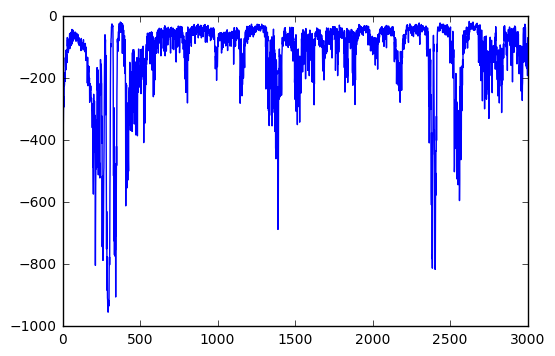

2999399 Episode 3000 rsum: -69 sigma: 0.1
3000399 Episode 3001 rsum: -133 sigma: 0.1
3001399 Episode 3002 rsum: -82 sigma: 0.1
3002399 Episode 3003 rsum: -45 sigma: 0.1
3003399 Episode 3004 rsum: -61 sigma: 0.1
3004399 Episode 3005 rsum: -163 sigma: 0.1
3005399 Episode 3006 rsum: -128 sigma: 0.1
3006399 Episode 3007 rsum: -273 sigma: 0.1
3007399 Episode 3008 rsum: -85 sigma: 0.1
3008399 Episode 3009 rsum: -142 sigma: 0.1
3009399 Episode 3010 rsum: -79 sigma: 0.1
3010399 Episode 3011 rsum: -164 sigma: 0.1
3011399 Episode 3012 rsum: -142 sigma: 0.1
3012399 Episode 3013 rsum: -208 sigma: 0.1
3013399 Episode 3014 rsum: -204 sigma: 0.1
3014399 Episode 3015 rsum: -137 sigma: 0.1
3015399 Episode 3016 rsum: -107 sigma: 0.1
3016399 Episode 3017 rsum: -57 sigma: 0.1
3017399 Episode 3018 rsum: -199 sigma: 0.1
3018399 Episode 3019 rsum: -275 sigma: 0.1
3019399 Episode 3020 rsum: -299 sigma: 0.1
3020399 Episode 3021 rsum: -325 sigma: 0.1
3021399 Episode 3022 rsum: -311 sigma: 0.1
3022399 Episode 30

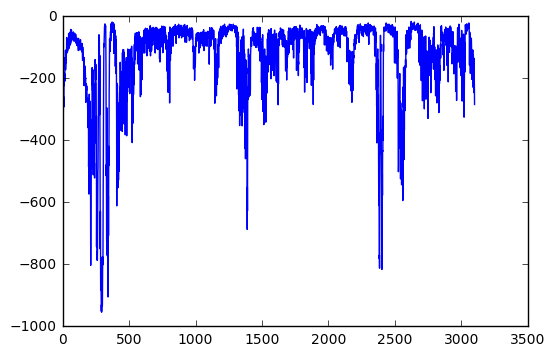

3099399 Episode 3100 rsum: -284 sigma: 0.1
3100399 Episode 3101 rsum: -238 sigma: 0.1
3101399 Episode 3102 rsum: -254 sigma: 0.1
3102399 Episode 3103 rsum: -257 sigma: 0.1
3103399 Episode 3104 rsum: -160 sigma: 0.1
3104399 Episode 3105 rsum: -181 sigma: 0.1
3105399 Episode 3106 rsum: -234 sigma: 0.1
3106399 Episode 3107 rsum: -177 sigma: 0.1
3107399 Episode 3108 rsum: -134 sigma: 0.1
3108399 Episode 3109 rsum: -169 sigma: 0.1
3109399 Episode 3110 rsum: -174 sigma: 0.1
3110399 Episode 3111 rsum: -178 sigma: 0.1
3111399 Episode 3112 rsum: -170 sigma: 0.1
3112399 Episode 3113 rsum: -94 sigma: 0.1
3113399 Episode 3114 rsum: -148 sigma: 0.1
3114399 Episode 3115 rsum: -169 sigma: 0.1
3115399 Episode 3116 rsum: -160 sigma: 0.1
3116399 Episode 3117 rsum: -109 sigma: 0.1
3117399 Episode 3118 rsum: -145 sigma: 0.1
3118399 Episode 3119 rsum: -163 sigma: 0.1
3119399 Episode 3120 rsum: -147 sigma: 0.1
3120399 Episode 3121 rsum: -150 sigma: 0.1
3121399 Episode 3122 rsum: -186 sigma: 0.1
3122399 Epis

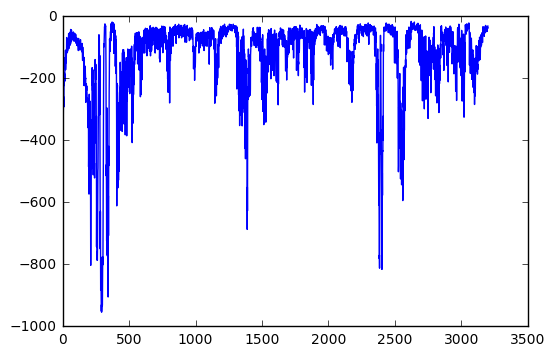

3199399 Episode 3200 rsum: -31 sigma: 0.1
3200399 Episode 3201 rsum: -63 sigma: 0.1
3201399 Episode 3202 rsum: -43 sigma: 0.1
3202399 Episode 3203 rsum: -38 sigma: 0.1
3203399 Episode 3204 rsum: -34 sigma: 0.1
3204399 Episode 3205 rsum: -34 sigma: 0.1
3205399 Episode 3206 rsum: -40 sigma: 0.1
3206399 Episode 3207 rsum: -51 sigma: 0.1
3207399 Episode 3208 rsum: -57 sigma: 0.1
3208399 Episode 3209 rsum: -41 sigma: 0.1
3209399 Episode 3210 rsum: -39 sigma: 0.1
3210399 Episode 3211 rsum: -47 sigma: 0.1
3211399 Episode 3212 rsum: -49 sigma: 0.1
3212399 Episode 3213 rsum: -47 sigma: 0.1
3213399 Episode 3214 rsum: -44 sigma: 0.1
3214399 Episode 3215 rsum: -57 sigma: 0.1
3215399 Episode 3216 rsum: -56 sigma: 0.1
3216399 Episode 3217 rsum: -49 sigma: 0.1
3217399 Episode 3218 rsum: -50 sigma: 0.1
3218399 Episode 3219 rsum: -52 sigma: 0.1
3219399 Episode 3220 rsum: -51 sigma: 0.1
3220399 Episode 3221 rsum: -47 sigma: 0.1
3221399 Episode 3222 rsum: -44 sigma: 0.1
3222399 Episode 3223 rsum: -60 sig

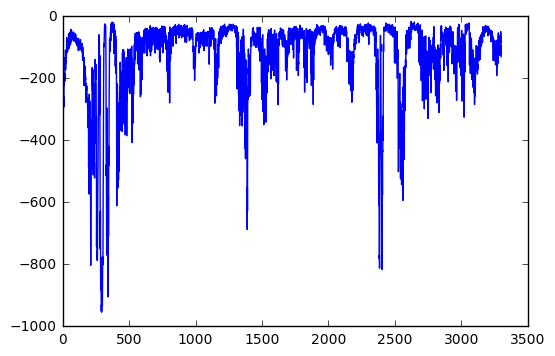

3299399 Episode 3300 rsum: -130 sigma: 0.1
3300399 Episode 3301 rsum: -88 sigma: 0.1
3301399 Episode 3302 rsum: -98 sigma: 0.1
3302399 Episode 3303 rsum: -88 sigma: 0.1
3303399 Episode 3304 rsum: -62 sigma: 0.1
3304399 Episode 3305 rsum: -117 sigma: 0.1
3305399 Episode 3306 rsum: -62 sigma: 0.1
3306399 Episode 3307 rsum: -96 sigma: 0.1
3307399 Episode 3308 rsum: -99 sigma: 0.1
3308399 Episode 3309 rsum: -97 sigma: 0.1
3309399 Episode 3310 rsum: -81 sigma: 0.1
3310399 Episode 3311 rsum: -54 sigma: 0.1
3311399 Episode 3312 rsum: -97 sigma: 0.1
3312399 Episode 3313 rsum: -88 sigma: 0.1
3313399 Episode 3314 rsum: -198 sigma: 0.1
3314399 Episode 3315 rsum: -176 sigma: 0.1
3315399 Episode 3316 rsum: -149 sigma: 0.1
3316399 Episode 3317 rsum: -85 sigma: 0.1
3317399 Episode 3318 rsum: -113 sigma: 0.1
3318399 Episode 3319 rsum: -94 sigma: 0.1
3319399 Episode 3320 rsum: -77 sigma: 0.1
3320399 Episode 3321 rsum: -54 sigma: 0.1
3321399 Episode 3322 rsum: -64 sigma: 0.1
3322399 Episode 3323 rsum: -

In [ ]:
sim = MazeSimulator(settings)
tf.reset_default_graph()
sess = tf.Session()
agent = DQN_Agent(settings, sess)
MaxEpisode = 50000
MaxStep = 1000
eps = 1
trainsteps = 0
rlog = []
losslog = []
for episode in range(MaxEpisode):
    sim = MazeSimulator(settings)
    s = sim.observe()
    rsum = 0
    for step in range(MaxStep):

        # epsilon greedy
        if np.random.rand(1) < eps:
            a_idx = np.random.randint(0, 5)
        else:
            Q = sess.run(agent.Q, feed_dict={agent.S:[s]})[0]
            a_idx = np.argmax(Q)
            
        action = actionmap[a_idx]
        s1, r, d = sim.step(*action)
        agent.buffer_add(s, a_idx, r, s1, d)
        rsum += r
        # train
        if agent.buffer_ready:
            loss = agent.train_it()
            losslog.append(loss)
            trainsteps += 1
            eps *= 0.99999
            if eps < 0.1: eps = 0.1
        s = s1
        #sim.draw([action, r])
        if d: break
        
    # End of Episode
    rlog.append(rsum)
    if episode % 100 == 0:
        plt.plot(rlog)
        plt.show()
    if agent.buffer_ready:
        print trainsteps, 'Episode', episode, 'rsum:', rsum, 'sigma:', eps
    else:
        print trainsteps, 'Episode', episode, 'rsum:', rsum, 'lenbuff', len(agent.exp_buffer)

In [12]:
Q

array([-0.02146188, -0.02375085, -0.00663407, -0.00058748,  0.02260442], dtype=float32)